<a href="https://colab.research.google.com/github/josephgonz12/MAS4115/blob/main/advanced_functions_and_lists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default parameters

It's often convenient to have default values to some of the parameters.

If we want to override an default argument value, it's often clearer if we explicitly spell out the name

In [1]:
# 1e-8 means 10**-8, see https://en.wikipedia.org/wiki/Scientific_notation
def are_epsilon_close(a, b, eps=1e-8):
  return abs(a-b) <= eps

assert are_epsilon_close((2**0.5)**2, 2) # using the default eps
assert are_epsilon_close((2**0.5)**2, 2, eps=1e-12) # overriding eps
# assert are_epsilon_close((2**0.5)**2, 2, eps = 0) # fails!

# Comparing sequences (strings, tuples)

Lexicographical comparison (like words in a dictionary) is used.

In [2]:
"Paul" < "Pole"

True

In [3]:
(1,2,3) < (1,2,4)

True

# Functions taking functions as arguments (intermediate)

It's often useful to pass one function to another.

For example min/max function accept an optional parameter 'key', which is a function which should extract the value to compare the elements by.

> In practice, one often uses lambda functions in such situations, but let's skip that

In [4]:
def by_second(x):
  return x[1]

def by_sum(x):
  return x[0]+x[1]

def default_key(x):
  return x

# tuples are compared lexicographically by default (like words)!
print("default (lexicographic):", min((1,2), (1,-1)))

min_value_by_second = min((1, 2), (5, -1), key=by_second)
min_value_by_sum = min((1,2), (5,-1), key=by_sum)

print("by second", min_value_by_second)
print("by sum", min_value_by_sum)

default (lexicographic): (1, -1)
by second (5, -1)
by sum (1, 2)


In [5]:
my_comparison = by_sum # we can simply assign a function to a variable!

if 1==2:
  operation = min
else:
  operation = max

best_value = operation((5,-1), (1,3), key=my_comparison)

print(best_value) # makes sense?

(5, -1)


# Task 1

Implement a function 'diff' which accepts another function $f : \mathbb{R} \to \mathbb{R}$, two real/float numbers $x_0, h$ and returns an approximation of the derivative of $f$ evaluated at $x_0$. Test it.

Remember that the standard definition of derivative of $f$ evaluated at $x_0$ is $f'(x_0) = \lim_{h \to 0} \frac{f(x_0+h)-f(x_0)}{h}$.

> Instead of thinking about limits, we'll cheat and use some (usually small) value of $h$.

> Bonus: Assuming $f :  \mathbb{R}^2 \to \mathbb{R}$, write a function grad which returns the gradient of $f$ evalauted at $x_0$ (again with small $h$).



In [14]:
#%%file x.py

# just a useful function
def are_epsilon_close(a, b, eps=1e-8):
  return abs(a-b) <= eps

def diff(f, x0, h=1e-8):
  '''
  Approximates the derivative of f at value x0 with some
  (presumabely) small value of h.

  (We can't really take a limit here, but for small enough h
  we should get a good approximation.)
  '''
  limit = (f(x0 + h) - f(x0))/h
  return limit


def quadratic_func(x):
  return x**2

def test_diff_on_square_at_1():
  d = diff(quadratic_func, 1, 1e-8) # diff of x**2 at point 1.0...
  assert are_epsilon_close(2,  d, eps=1e-5) # should be 2.0

In [15]:
diff(quadratic_func, 1)

1.999999987845058

In [16]:
import matplotlib.pyplot as plt

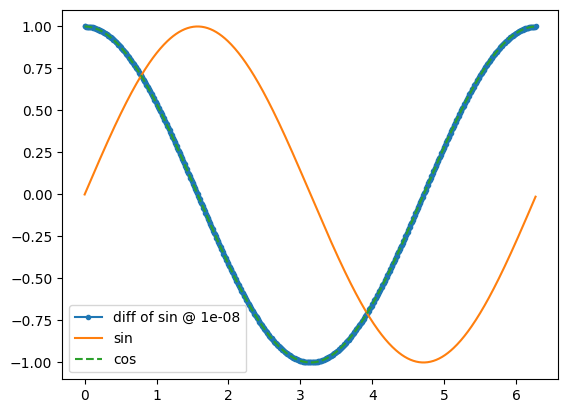

In [17]:
# This uses some things we haven't covered yet! Just run it!
from math import sin,cos
xs = [x/100 for x in range(628)]
ss = [sin(x) for x in xs]
cs = [cos(x) for x in xs]

for h in (1e-8,): # can also try other values of h
  ys = [diff(sin, x, h) for x in xs]
  plt.plot(xs, ys, '.-', label=f'diff of sin @ {h}')

plt.plot(xs, ss, label='sin')
plt.plot(xs, cs, '--', label='cos')
plt.legend()

# Lists

We can now store as many things as we want.

> Also: they can be of any type, for now we focus on numbers

In [18]:
my_list = [2, 3, 5, 8]

In [19]:
print(type(my_list)) # yup, it is actually a list!

<class 'list'>


## Idiomatic checking for non-emptiness and the length of the list

In [20]:
if my_list: # also works for tuples any other 'containers'!
  print('this list is nonempty')
else:
  print('oops, this list is empty')

this list is nonempty


In [21]:
# alternatively:
if not my_list:
  print('oops, this list is empty')

If really necessary we can take the length

> checking for emptiness by checking the length is considered lame in python

In [ ]:
print("length: ", len(my_list))

##Generating large lists (of equal elements)

While we'll see better ways of constructing lists, it's sometimes useful to generate an 'empty' list of a given size and populate it with values in a loop.

> You need to be careful with generating lists of lists this way -- you'll get many references to a single list.

In [22]:
my_long_list = [0] * 10 # !
print(my_long_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Accessing elements

In [23]:
# we can index the list, starting from 0 (as it should be)
print(my_list)
print(my_list[0])

[2, 3, 5, 8]
2


In [24]:
my_list = [2, 3, 5, 8]
print(my_list)
my_list[0] = 5 # unlike tuples, lists can be modified
my_list[1] += 3 # unlike tuples, lists can be modified
print(my_list)

[2, 3, 5, 8]
[5, 6, 5, 8]


In [25]:
# ?? what would happen if you tried to access, say,  my_list[1000], my_list[-1]?
# try it out!
my_list[-1] # ??

8

In [26]:
my_tuple = (2, 3, 5, 8)
# my_tuple[0] = 5 # error! Tuples are immutable!

# Basic list slicing

We can access parts of lists. Most useful is getting first k and last k elements, and reversing the whole list

> It's much more flexible, you can play with it later


In [27]:
k = 2
print(my_list)
print(my_list[:k]) # [0:k)
print(my_list[-k:]) # [n-k:n)
print(my_list[k:]) # [k:n)
print(my_list[::-1]) # [n-1, n-2, ..., 0]

[5, 6, 5, 8]
[5, 6]
[5, 8]
[5, 8]
[8, 5, 6, 5]


##Danger!

Decide what your expectation is before running! Are you surprised?

In [28]:
A = [1,2,3]
B = A
A += [100] # what about the one below?
#A = A + [100]
B[0] = -1

print(A, B, A is B)

[-1, 2, 3, 100] [-1, 2, 3, 100] True


In [29]:
A = [1,2,3]
B = A.copy() # !
A += [100]
B[0] = -1

print(A, B, A is B)

[1, 2, 3, 100] [-1, 2, 3] False


# Danger inside functions

In [30]:
def change_list(my_list):
  my_list[0] += 10
  my_list += [-1]
  # my_list = my_list + [-1]
  print('list inside before:', my_list)
  my_list = [20,30,40]
  print('list inside after:', my_list)

L = [1,2,3]
print('list outside before:', L)
change_list(L)
print('list outside after:', L)

list outside before: [1, 2, 3]
list inside before: [11, 2, 3, -1]
list inside after: [20, 30, 40]
list outside after: [11, 2, 3, -1]


In [ ]:
# standard workaround!
def added_suffix(x, y=None):
  if y == None: y = []
  res = x + y
  y += ["I changed y accidentally, it shouldn't matter"]
  return res


print(added_suffix([1,2,3]))
print(added_suffix([1,2,3], [4]))
print(added_suffix([1,2,3]))

## Extra (danger)

In [32]:
# standard error!
def added_suffix(x, y=[]):
  res = x + y
  y += ["I changed y accidentally, it shouldn't matter"]
  return res


print(added_suffix([1,2,3]))
print(added_suffix([1,2,3], [4]))
print(added_suffix([1,2,3]))

[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, "I changed y accidentally, it shouldn't matter"]
